**[Day3]**  24.3.22.금

<small>5.2.1 (166p) ~ 6.1.3 (213p)<small>

5.2.1 온도문제

5.2.2 데이터 수집

In [1]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0] #섭씨
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] #단위 모르는 기온
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

In [3]:
#모델 작성
def model(t_u, w, b): #입력텐서, 가중치, 편향
    return w *t_u + b

In [4]:
#손실함수 작성
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2 #요소단위 값차이^2한 텐서 -> 텐서의 모든요소에 대한 평균구해 스칼라값 생성
    return squared_diffs.mean() #평균제곱손실(mean square loss)

In [5]:
#파라미터 초기화 후 모델 불러오기
w = torch.ones(()) #튜플 형태~
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([[35.7000],
        [55.9000],
        [58.2000],
        [81.9000],
        [56.3000],
        [48.9000],
        [33.9000],
        [21.8000],
        [48.4000],
        [60.4000],
        [68.4000]])

In [6]:
#손실값 체크
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

5.4.1 손실 줄이기

In [7]:
#w, b값을 delta값으로 아주 조금만 줄여 손실값 변하는 정도 확인~
#\ : 변수 할당이 여러줄에 걸쳐 있음. 엔터쳐도 무시하고 변수 할당 정상적으로 함. 
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [8]:
learning_rate = 1e-2 #0.01

w = w - learning_rate * loss_rate_of_change_w

In [9]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [10]:
#미분식1
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [11]:
#미분식2
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

<모델에 미분 적용하기>

In [12]:
#모델 정의
def model(t_u, w, b): 
    return w *t_u + b

#미분구하기
def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

<경사 함수 정의하기>

In [13]:
#모두 합쳐 w, b에 대한 손실값의 미분 반환 함수 만들기
#합 계산은 입력 벡터에 적용하던 브로드캐스팅의 역순
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

5.4.3 모델 적합을 위한 반복

<훈련루프>

In [14]:
#전체 훈련 루프****************
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # 순방향전달
        loss = loss_fn(t_p, t_c) #손실계산
        grad = grad_fn(t_u, t_c, t_p, w, b)  # 역방향전달

        params = params - learning_rate * grad #경사하강법: 파라미터 업데이트

        print('Epoch %d, Loss %f' % (epoch, float(loss))) 
            
    return params

In [15]:
#훈련루프 실행
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)


Epoch 1, Loss 1763.884766
Epoch 2, Loss 5802484.500000
Epoch 3, Loss 19408029696.000000
Epoch 4, Loss 64915905708032.000000
Epoch 5, Loss 217130525461053440.000000
Epoch 6, Loss 726257583152928129024.000000
Epoch 7, Loss 2429183416467662896627712.000000
Epoch 8, Loss 8125122549611731432050262016.000000
Epoch 9, Loss 27176882120842590626938030653440.000000
Epoch 10, Loss 90901105189019073810297959556841472.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

과도한훈련 : 발산

In [16]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714
Epoch 31, Loss 29.085804
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083967
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081221
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079390
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077562
Epoch 

tensor([ 0.2327, -0.0438])

5.4.4 입력 정규화

In [17]:
#입력값을 변경해서 기울기가 큰 차이나지 않게 (-1~1)
t_un = 0.1 * t_u

In [18]:
#정규화된 거 = 변수이름에 n #정규화된 값으로 훈련루프 돌리기
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, # <1>
    t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 2.7553, -2.5162])

In [19]:
#params 값의 변화량이 작아질떄까지 에폭 반복
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c)
params

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([  5.3671, -17.3012])

5.4.5 시각화

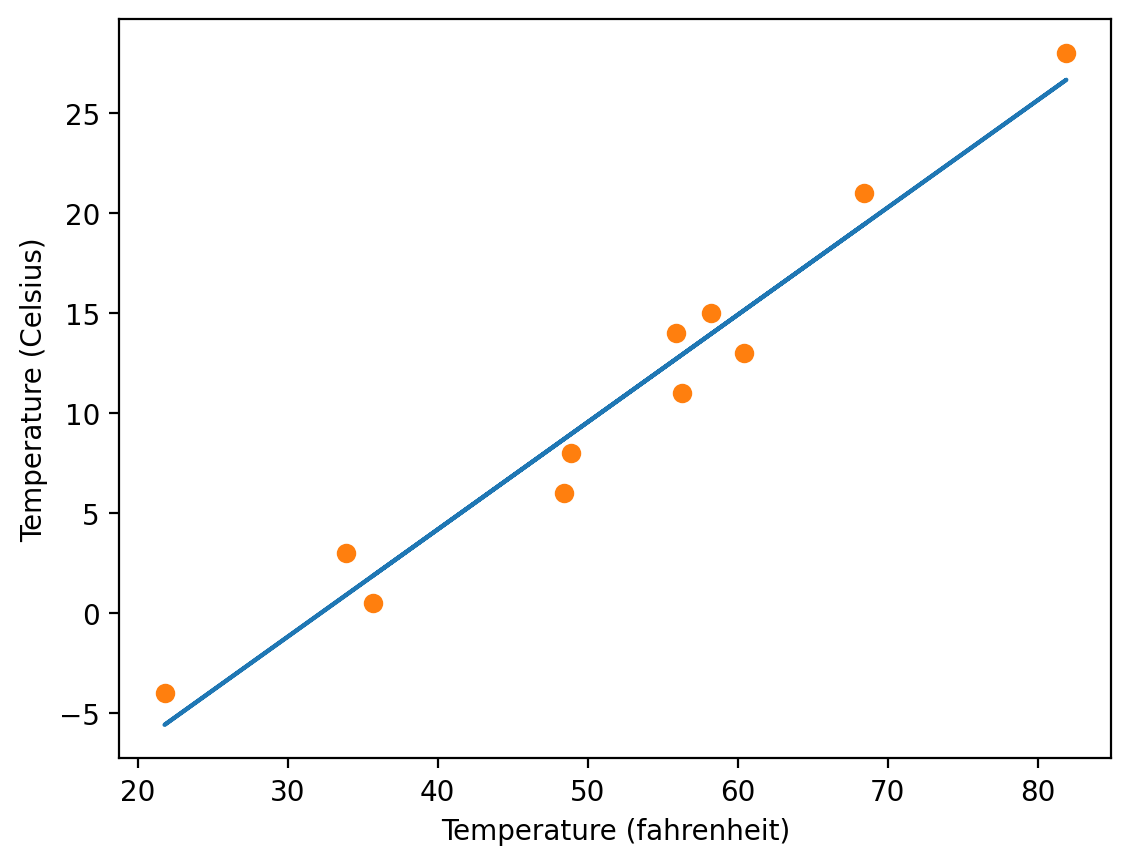

In [20]:
%matplotlib inline

from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure(dpi=200) #dpi : 인치당 픽셀수
plt.xlabel("Temperature (fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

파이토치의 자동미분 : 모든 것을 역전파하라

5.5.1 기울기 자동 계산

In [21]:
#<자동미분 적용하기>
#손실함수모델
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [22]:
#파라미터 텐서 초기화
params = torch.tensor([1.0, 0.0], requires_grad=True) #[기울기, 절편], 그라디언트 계산 활성화

#torch.ones() .zeros()같은거 안 쓰고 

<미분 속성 사용하기>

In [23]:
params.grad is None #역대 모든 함수 기억하는지

True

In [24]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

<미분 함수 누적하기>

In [25]:
if params.grad is not None: #기억하면, 마지막 노드에 누적된 미분이 같이 적용되기때문에 초기화해야함
    params.grad.zero_()

In [26]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None: #loss.backward() 호출 전 아무데나 적기
           params.grad.zero_()

        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [27]:
#돌려돌려
training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830


Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

5.5.2 골라쓰는 옵티마이저

In [28]:
import torch.optim as optim

dir(optim) #requires_grad=True로 설정되어있음

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

<경사하강 옵티마이저 사용하기>

In [29]:
#param만들고 경사하강 옵티마이저 인스턴스 생성
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [30]:
#옵티마이저 돌려보기
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step() #

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [31]:
#훈련루프도 단순하게 파라미터 리스트 전달함으로써 옵티마이저 돌려보기~
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs +1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' %(epoch, float(loss)))

    return params

In [32]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un, 
    t_c = t_c
)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

<다른 옵티마이저 테스트하기>

In [33]:
#SGD대신 아담 등 다른 옵티마이저를 인스턴스로 만들기만 하면 됌/딴건 안바꿈
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate) #여기에 새 옵티마이저 넣으면 성공~!**

training_loop(
    n_epochs = 2000,
    optimizer = optimizer,
    params = params,
    t_u = t_u,
    t_c = t_c)

Epoch 500, Loss 7.612898
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928579
Epoch 2000, Loss 2.927644


tensor([  0.5367, -17.3021], requires_grad=True)

5.5.3 훈련, 검증, 과적합 

<훈련손실 평가하기>

<검증셋으로 일반화하기>

<데이터셋 나누기>


In [35]:
#t_u, t_c를 같은식으로 shuffle해 만들어진 텐서를 두 개로 나누기
n_samples = t_u.shape[0] #전체 샘플수
n_val = int(0.2 * n_samples) #검증세트 크기(20%)

shuffled_indices = torch.randperm(n_samples) #무작위로 섞은 인덱스배열 생성

train_indices = shuffled_indices[:-n_val] #전체 - 검증세트 크기 = 학습세트
val_indices = shuffled_indices[-n_val:] #나머지 부분으로 검증 세트의 인덱스 구성

train_indices, val_indices

(tensor([1, 3, 2, 5, 7, 8, 4, 6, 0]), tensor([10,  9]))

In [36]:
#인덱스 텐서 얻었으니 데이터 텐서로부터 훈련셋, 검증셋 만들기
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [37]:
#에포크마다 val에 대한 손실 계산해 과적합 여부 파악
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params) #train
        train_loss = loss_fn(train_t_p, train_t_c)
                             
        val_t_p = model(val_t_u, *params)  #validation
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward() #validation은 학습하면 안되니까 .backward()없음
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return params

In [38]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # SGD써서 정규화된 입력 사용함 
    val_t_u = val_t_un, # SGD써서 정규화된 입력 사용함 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 70.5623, Validation loss 124.4736
Epoch 2, Training loss 40.3757, Validation loss 51.5750
Epoch 3, Training loss 34.2208, Validation loss 30.3821
Epoch 500, Training loss 7.1204, Validation loss 6.4052
Epoch 1000, Training loss 3.4128, Validation loss 4.2236
Epoch 1500, Training loss 2.8828, Validation loss 3.7480
Epoch 2000, Training loss 2.8070, Validation loss 3.6181
Epoch 2500, Training loss 2.7962, Validation loss 3.5761
Epoch 3000, Training loss 2.7946, Validation loss 3.5612


tensor([  5.3306, -17.0593], requires_grad=True)

5.5.4 자동미분의 주의사항과 자동미분 끄기

In [39]:
#model과 loss_fn에 대해 별개의 텐서가 다른 연산 그래프 만듦
#두 그래프가 공유하는 유일한 텐서는 '파라미터 텐서'

#1안. requires_grad == False로 자동미분 끄기
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params) #rain_t_u에 대해 평가 후, train_t_p만듦
        train_loss = loss_fn(train_t_p, train_t_c) #train_t_p로부터 train_loss평가됨
        with torch.no_grad(): # 
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c) 
            assert val_loss.requires_grad == False # 아걸로 자동미분 끄기~
            
        
        optimizer.zero_grad()
        train_loss.backward() #만약에 val_loss.backward()하면 : train_loss.backward()로 호출된 params텐서에 추가로 기울기 누적됨 : val, train 둘 다 훈련됨
        optimizer.step()

In [40]:
#2안. .set_grad_enabled로 autograd 켜기/끄기 가능~
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss